<a href="https://colab.research.google.com/github/LuanaLeite/TG-EDUCACAO/blob/main/TG1_educacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho em Grupo 1 - Dimensão: educação**


> **Alunos**: Gabriela Hubner, Luana Leite, Matilde Westphal e Nilo Stangarlin            
> **Repositório**: https://github.com/LuanaLeite/TG-EDUCACAO

# **Metodologia**


## *Escolha das informações*




A escolha das informações selecionadas tem como objetivo identificar o perfil demográfico dos habitantes de cada cidade brasileira. Nesse sentido, informações como idade, gênero, renda e educação foram coletadas.  

Entendemos que para a realização de uma análise completa, ainda é necessário encontrar novas bases de informações para compreender outras questões relacionadas ao contexto da cidade como, por exemplo, unidades educacionais e industria local. Esses dados ainda não estão inclusos nessa primeira análise. 

## *Dicionário de variáveis*

As variáveis selecionadas para a realização do trabalho se encontram neste [arquivo](https://docs.google.com/spreadsheets/d/13ynlZniRJeRXe4KTpLZjQB-dE3ZRejLeVpx95cevE5c/edit?usp=sharing).

## *Seleção das bases*

As bases selecionadas para a primeira versão da análise foram do IBGE, do censo de 2010. Para os 27 estados do país, foram coletados os seguintes dados a nível municipal: 

**Trabalho e Rendimento**
*   **Tabela 1** - Pessoas de 10 anos ou mais de idade, por grupos de idade;
*   **Tabela 2** - Pessoas de 10 anos ou mais de idade, por condição de aposentada ou pensionista de instituto de previdência oficial, no mês de referência, e sexo;
* **Tabela 3** - Pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho, e valor do rendimento nominal médio e mediano mensal de todos os trabalhos das pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho, por condição de contribuição para instituto de previdência oficial em qualquer trabalho, segundo as mesorregiões, as microrregiões e os municípios; 
* **Tabela 4** - Valor do rendimento nominal médio mensal do trabalho principal das pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento do trabalho principal, por posição na ocupação e categoria do emprego no trabalho principal; 

**Educação e deslocamento**

* **Tabela 5** - Pessoas que frequentavam escola ou creche, por grupos de idade;
* **Tabela 6** - Pessoas que não frequentavam escola ou creche, por grupos de idade;
* **Tabela  7** - Pessoas que frequentavam escola ou creche da rede pública, por curso que frequentavam;
* **Tabela 8** - Pessoas que frequentavam escola ou creche da rede particular, por curso que frequentavam;
*  **Tabela 9** - Pessoas de 25 anos ou mais de idade, por sexo e nível de instrução;

**Indicadores sociais municipais**
* **Tabela 10** - População residente, total e respectiva distribuição percentual, por situação do domicílio e sexo, e razão de sexo. 



## *Coleta e pré-processamento*


Foi realizado o download de todas as tabelas citadas anteriormente, dos 27 estados do país. Em um excel, o grupo reuniu todas as tabelas, adicionando novas colunas e informações, tomando o devido cuidado para que as informações fossem atribuidas a cada cidade corretamente. Foi necessária fazer a substituição de informações como traços "-" para valores em branco para conseguir padronizar a ausencia dessas informações em todas as colunas.  
Após a compilação de todas as cidades do país em único arquivo, salvamos o documento em CSV e realizamos o branch no repositório do GitHub.

# Bibliotecas 

In [ ]:
# Common standard libraries

import datetime
import time
import os

In [ ]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup
import math 

In [ ]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Setting plot appearance

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Importação dos dados

In [ ]:
# GitHub
df = pd.read_csv('https://raw.githubusercontent.com/LuanaLeite/TG-EDUCACAO/main/base_dados_br_5.csv', sep=';')

# Análises iniciais dos dados importados

In [ ]:
df.shape

(5565, 80)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cidade                   5565 non-null   object
 1   Estado                   5565 non-null   object
 2   pop_f1                   5565 non-null   int64 
 3   pop_f2                   5565 non-null   int64 
 4   pop_f3                   5565 non-null   int64 
 5   pop_f4                   5565 non-null   int64 
 6   pop_f5                   5565 non-null   int64 
 7   pop_f6                   5565 non-null   int64 
 8   pop_f7                   5565 non-null   int64 
 9   pop_f8                   5565 non-null   int64 
 10  pop_f9                   5565 non-null   int64 
 11  pop_f10                  5565 non-null   int64 
 12  pop_f11                  5565 non-null   int64 
 13  pop_f12                  5565 non-null   int64 
 14  pop_f13                  5565 non-null  

In [ ]:
print(df)

                                Cidade       Estado  pop_f1  pop_f2  pop_f3  \
0                                Amapá        Amapá     885     175     172   
1                             Calçoene        Amapá     916     232     149   
2                               Cutias        Amapá     494     152     107   
3                       Ferreira Gomes        Amapá     550     116     143   
4                              Itaubal        Amapá     475     117     150   
...                                ...          ...     ...     ...     ...   
5560              Vale de São Domingos  Mato Grosso     230      67      72   
5561                     Várzea Grande  Mato Grosso   17999    4997    4698   
5562                              Vera  Mato Grosso     860     278     219   
5563  Vila Bela da Santíssima Trindade  Mato Grosso    1250     317     385   
5564                         Vila Rica  Mato Grosso    1836     477     599   

      pop_f4  pop_f5  pop_f6  pop_f7  pop_f8  ...  

In [ ]:
df.head()

,Cidade,Estado,pop_f1,pop_f2,pop_f3,pop_f4,pop_f5,pop_f6,pop_f7,pop_f8,...,freq_superior_priv,freq_pos_priv,adult_fundament_incomp,adult_medio_incomp,adult_sup_incomp,adult_sup_completo,quant_urbano,quant_rural,quant_masculino,quant_feminimo
0,Amapá,Amapá,885,175,172,406,309,757,696,617,...,37,13,2163,417,795,128,86,14,52,48
1,Calçoene,Amapá,916,232,149,369,322,753,735,652,...,97,13,2385,677,762,146,81,19,54,46
2,Cutias,Amapá,494,152,107,245,203,432,383,310,...,47,21,1018,285,411,101,52,48,52,48
3,Ferreira Gomes,Amapá,550,116,143,312,198,496,428,480,...,104,11,1423,334,692,101,72,28,53,48
4,Itaubal,Amapá,475,117,150,189,153,377,332,301,...,50,4,1157,231,283,30,41,59,54,46


In [ ]:
df[['Cidade']].describe()

,Cidade
count,5565
unique,5292
top,São Domingos
freq,5


In [ ]:
df[['Estado']].describe()

,Estado
count,5565
unique,27
top,Minas Gerais
freq,853


In [ ]:
# mostra as informações de estado agrupadas 
df.groupby(['Estado']).sum()

,pop_f1,pop_f2,pop_f3,pop_f4,pop_f5,pop_f6,pop_f7,pop_f8,pop_f9,pop_f10,...,freq_superior_priv,freq_pos_priv,adult_fundament_incomp,adult_medio_incomp,adult_sup_incomp,adult_sup_completo,quant_urbano,quant_rural,quant_masculino,quant_feminimo
Estado,,,,,,,,,,,,,,,,,,,,,
Acre,71370,16338,17100,31309,28571,70335,67418,59105,47777,39928,...,13054,1382,189838,41288,76510,30434,1094,1006,1089,1012
Alagoas,266981,70887,68931,125394,118634,289703,272414,246873,211589,193272,...,47599,6410,1022766,180116,290561,110975,5792,4410,5054,5147
Amapá,62799,16305,15024,30265,27955,68509,63763,55197,46687,37214,...,19382,1877,128899,41880,101142,33199,1101,499,838,763
Amazonas,322533,78164,78766,148787,137208,339440,323526,285747,232755,191784,...,64927,7133,778067,223466,479655,133537,3406,2795,3227,2974
Bahia,1068931,270637,278903,539326,508097,1303709,1309202,1171294,982693,903616,...,215988,29497,4540311,911715,1824996,499196,22630,19074,20966,20737
Ceará,665940,181525,182431,342570,321662,822861,742972,658095,576260,541126,...,127963,18195,2624113,618662,1013822,329090,10372,8029,9168,9234
Distrito Federal,175802,43289,45144,85728,89307,245521,267638,252432,212348,187844,...,127221,19669,451003,210195,470597,358275,0,0,0,0
Espírito Santo,240744,61632,62528,119394,119601,323366,322628,299476,258899,245189,...,86759,12083,1026022,298637,520076,229989,4946,2855,3925,3875
Goiás,422417,108877,111829,212032,209478,554033,556809,532981,473573,431102,...,156415,19029,1734981,525519,848606,356607,18451,6151,12575,12028


In [ ]:
df.tail()

,Cidade,Estado,pop_f1,pop_f2,pop_f3,pop_f4,pop_f5,pop_f6,pop_f7,pop_f8,...,freq_superior_priv,freq_pos_priv,adult_fundament_incomp,adult_medio_incomp,adult_sup_incomp,adult_sup_completo,quant_urbano,quant_rural,quant_masculino,quant_feminimo
5560,Vale de São Domingos,Mato Grosso,230,67,72,103,112,235,273,259,...,10,0,1170,265,230,77,23,77,54,46
5561,Várzea Grande,Mato Grosso,17999,4997,4698,9697,9191,25066,24654,23568,...,8400,802,61013,25185,40258,12491,98,2,50,50
5562,Vera,Mato Grosso,860,278,219,301,443,847,901,858,...,191,89,3413,1001,716,279,72,28,52,48
5563,Vila Bela da Santíssima Trindade,Mato Grosso,1250,317,385,616,419,1297,1288,1180,...,74,0,4775,942,1129,311,36,64,52,48
5564,Vila Rica,Mato Grosso,1836,477,599,881,686,2031,1933,1933,...,157,21,6932,1841,1687,557,65,35,52,48


In [ ]:
## identificando dados NaN
b = math.nan
print(np.isnan(b))

True


In [ ]:
df.isnull().sum()

Cidade                0
Estado                0
pop_f1                0
pop_f2                0
pop_f3                0
                     ..
adult_sup_completo    0
quant_urbano          0
quant_rural           0
quant_masculino       0
quant_feminimo        0
Length: 80, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_f1,5565.0,2455.073854,12711.299604,57.0,390.0,850.0,1860.0,694843.0
pop_f2,5565.0,629.778976,3179.970609,2.0,103.0,222.0,473.0,172508.0
pop_f3,5565.0,641.469542,3195.492550,9.0,105.0,226.0,491.0,171203.0
pop_f4,5565.0,1219.075831,6249.886700,24.0,198.0,424.0,899.0,334843.0
pop_f5,5565.0,1191.908535,6309.545938,13.0,179.0,400.0,854.0,335035.0
...,...,...,...,...,...,...,...,...
adult_sup_completo,5565.0,2309.051572,25412.430023,0.0,134.0,288.0,737.0,1461291.0
quant_urbano,5565.0,63.785085,22.093712,0.0,47.0,65.0,82.0,100.0
quant_rural,5565.0,36.168374,22.059667,0.0,18.0,35.0,53.0,96.0
quant_masculino,5565.0,50.474214,1.976204,0.0,50.0,50.0,51.0,81.0


In [ ]:
df.dtypes

Cidade                object
Estado                object
pop_f1                 int64
pop_f2                 int64
pop_f3                 int64
                       ...  
adult_sup_completo     int64
quant_urbano           int64
quant_rural            int64
quant_masculino        int64
quant_feminimo         int64
Length: 80, dtype: object

In [ ]:
# visualização por colunas de renda
cols_rent = ['rend_empreg_clt', 'rend_funcpubl', 'rend_empreg_nclt', 'rend_autonomos', 'rend_empregador', 'adult_sup_completo']

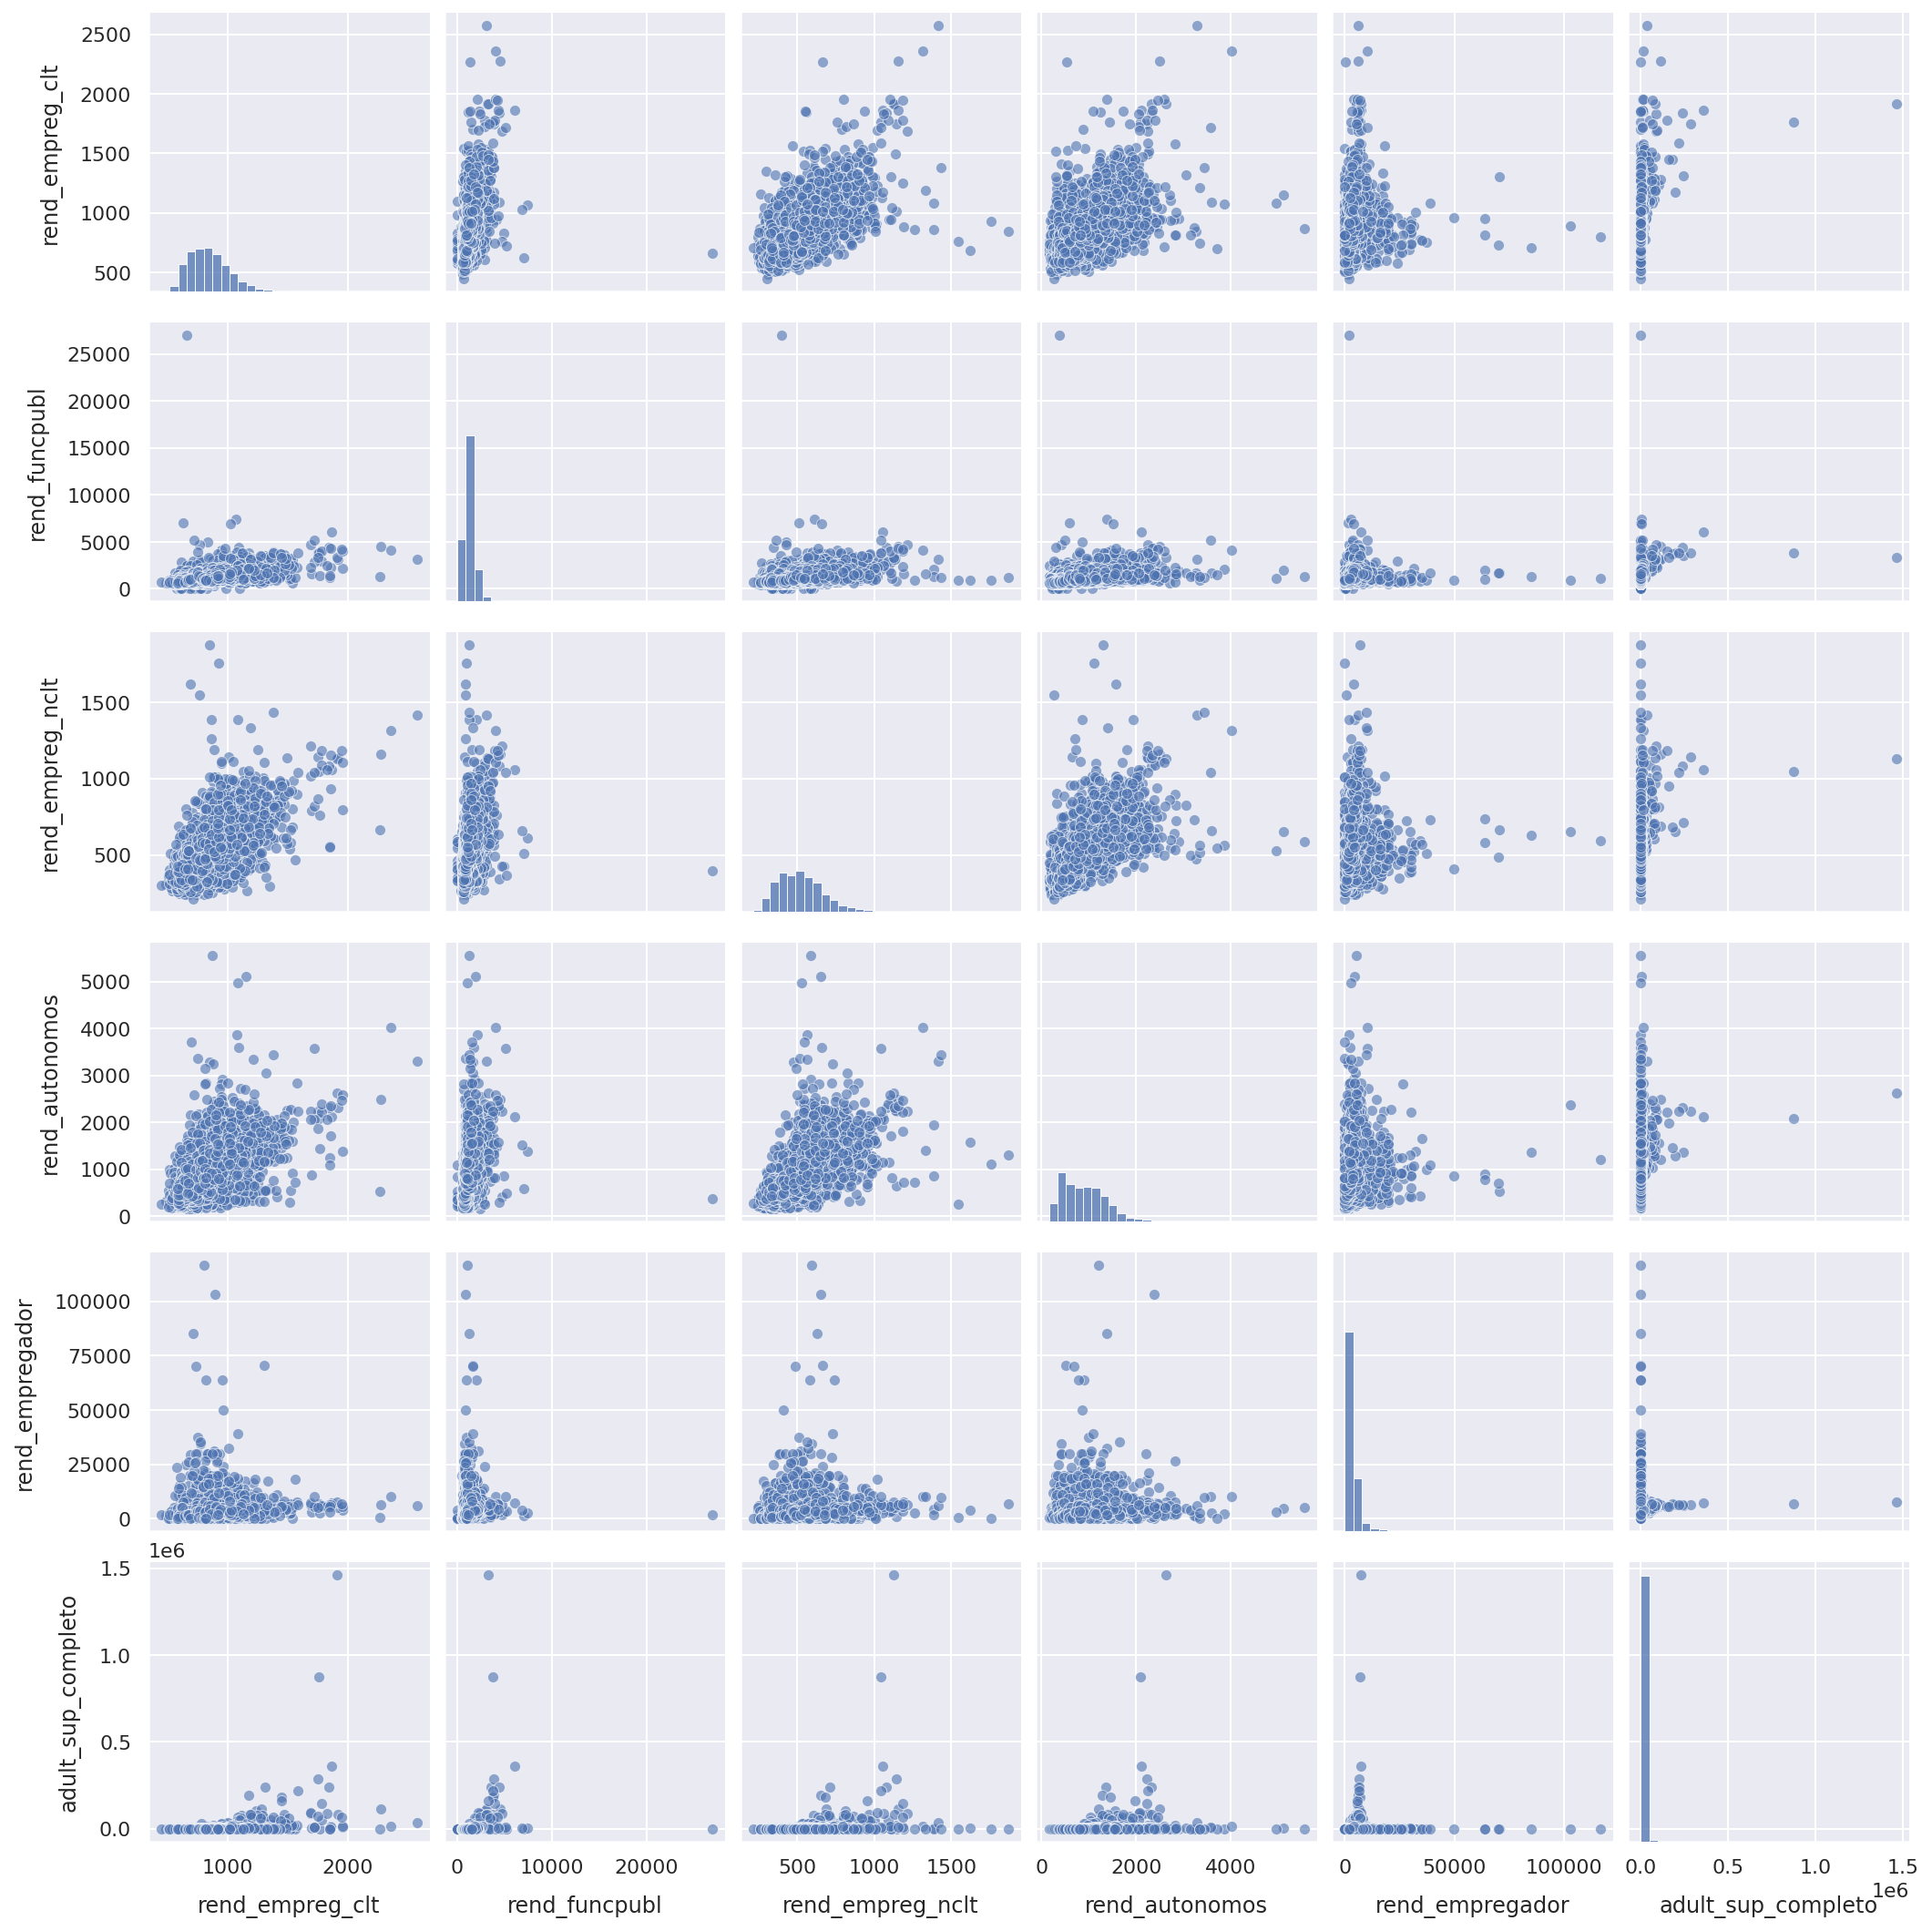

In [ ]:
sns.pairplot(df[cols_rent],
              plot_kws={'alpha': 0.6},
              diag_kws={'bins': 30})

In [ ]:

pd.DataFrame(
    df.groupby(
        by='Estado'
    )['pop_f1', 'pop_f2', 'pop_f3', 'pop_f4', 'pop_f5', 'pop_f6', 'pop_f7','pop_f8', 'pop_f9', 'pop_f10', 
      'pop_f11','pop_f12', 'pop_f13', 'pop_f14', 'pop_f15'].sum()
)

<ipython-input-39-0729c1f79fcc>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(


,pop_f1,pop_f2,pop_f3,pop_f4,pop_f5,pop_f6,pop_f7,pop_f8,pop_f9,pop_f10,pop_f11,pop_f12,pop_f13,pop_f14,pop_f15
Estado,,,,,,,,,,,,,,,
Acre,71370,16338,17100,31309,28571,70335,67418,59105,47777,39928,31481,25962,20414,26841,19958
Alagoas,266981,70887,68931,125394,118634,289703,272414,246873,211589,193272,161623,133092,112162,156364,119805
Amapá,62799,16305,15024,30265,27955,68509,63763,55197,46687,37214,28922,22920,16681,20074,14661
Amazonas,322533,78164,78766,148787,137208,339440,323526,285747,232755,191784,157397,125412,96644,121130,89042
Bahia,1068931,270637,278903,539326,508097,1303709,1309202,1171294,982693,903616,780965,665248,531496,777315,672696
Ceará,665940,181525,182431,342570,321662,822861,742972,658095,576260,541126,479191,373630,313836,472805,436417
Distrito Federal,175802,43289,45144,85728,89307,245521,267638,252432,212348,187844,157673,124462,95703,118604,79408
Espírito Santo,240744,61632,62528,119394,119601,323366,322628,299476,258899,245189,227840,198867,160829,199459,165409
Goiás,422417,108877,111829,212032,209478,554033,556809,532981,473573,431102,371951,303311,243840,324187,236266


In [ ]:
pop_renda_faixa_idade = df.groupby(
        by='Estado'
    )['pop_f1', 'pop_f2', 'pop_f3', 'pop_f4', 'pop_f5', 'pop_f6', 'pop_f7','pop_f8', 'pop_f9', 'pop_f10', 
      'pop_f11','pop_f12', 'pop_f13', 'pop_f14', 'pop_f15'].sum()

pop_renda_faixa_idade

<ipython-input-53-fa17efeddf60>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_renda_faixa_idade = df.groupby(


,pop_f1,pop_f2,pop_f3,pop_f4,pop_f5,pop_f6,pop_f7,pop_f8,pop_f9,pop_f10,pop_f11,pop_f12,pop_f13,pop_f14,pop_f15
Estado,,,,,,,,,,,,,,,
Acre,71370,16338,17100,31309,28571,70335,67418,59105,47777,39928,31481,25962,20414,26841,19958
Alagoas,266981,70887,68931,125394,118634,289703,272414,246873,211589,193272,161623,133092,112162,156364,119805
Amapá,62799,16305,15024,30265,27955,68509,63763,55197,46687,37214,28922,22920,16681,20074,14661
Amazonas,322533,78164,78766,148787,137208,339440,323526,285747,232755,191784,157397,125412,96644,121130,89042
Bahia,1068931,270637,278903,539326,508097,1303709,1309202,1171294,982693,903616,780965,665248,531496,777315,672696
Ceará,665940,181525,182431,342570,321662,822861,742972,658095,576260,541126,479191,373630,313836,472805,436417
Distrito Federal,175802,43289,45144,85728,89307,245521,267638,252432,212348,187844,157673,124462,95703,118604,79408
Espírito Santo,240744,61632,62528,119394,119601,323366,322628,299476,258899,245189,227840,198867,160829,199459,165409
Goiás,422417,108877,111829,212032,209478,554033,556809,532981,473573,431102,371951,303311,243840,324187,236266


## Renda por estados do Brasil



In [ ]:
rend_empreg_clt = df.groupby(
        by='Estado'
    )['rend_empreg_clt'].mean()

rend_empreg_clt

Estado
Acre                   1001.409091
Alagoas                 723.627451
Amapá                  1097.625000
Amazonas               1025.741935
Bahia                   743.880096
Ceará                   694.461957
Distrito Federal       1863.000000
Espírito Santo          884.846154
Goiás                   903.861789
Maranhão                778.751152
Mato Grosso             992.234043
Mato Grosso do Sul      926.615385
Minas Gerais            768.259086
Paraná                  900.984962
Paraíba                 703.878924
Pará                    853.461538
Pernambuco              731.497297
Piauí                   775.790179
Rio Grande do Norte     739.449102
Rio Grande do Sul       897.080645
Rio de Janeiro         1017.402174
Rondonia                946.980769
Roraima                1038.066667
Santa Catarina          971.085324
Sergipe                 775.440000
São Paulo              1019.133333
Tocantins               839.014388
Name: rend_empreg_clt, dtype: float64

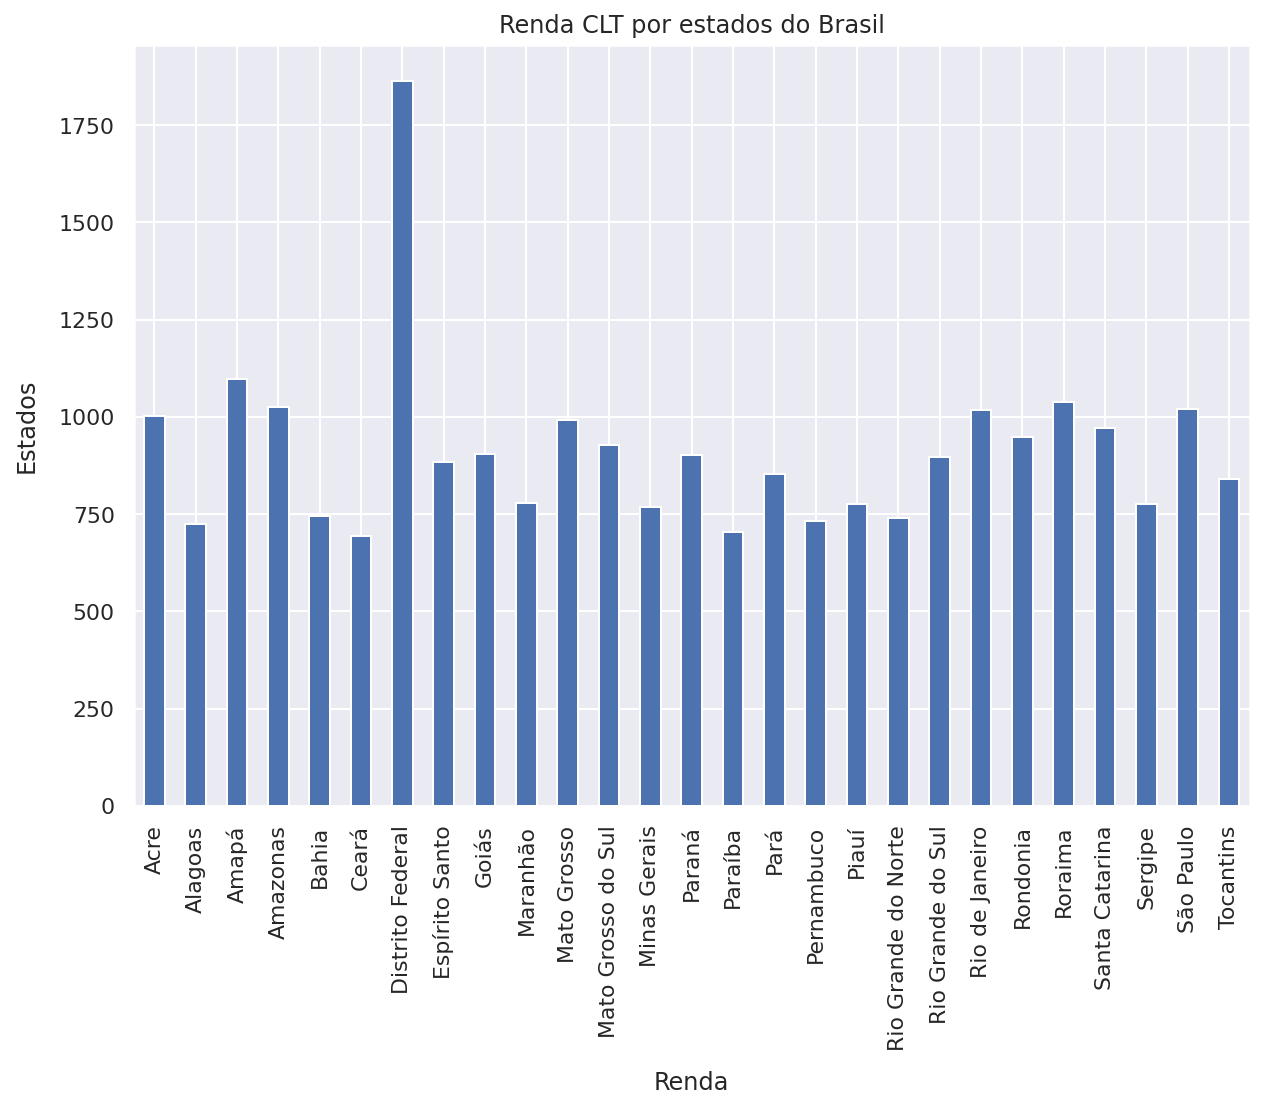

In [ ]:
ax = rend_empreg_clt.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda CLT por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [ ]:
rend_funcpubl = df.groupby(
        by='Estado'
    )['rend_funcpubl'].mean()

rend_funcpubl

Estado
Acre                   1655.636364
Alagoas                 969.254902
Amapá                  1898.312500
Amazonas               1181.806452
Bahia                  1142.201439
Ceará                  1013.369565
Distrito Federal       6101.000000
Espírito Santo         1525.397436
Goiás                  1294.947154
Maranhão                923.682028
Mato Grosso            1368.460993
Mato Grosso do Sul     1599.141026
Minas Gerais           1106.907386
Paraná                 1616.518797
Paraíba                 918.286996
Pará                   1074.923077
Pernambuco             1072.854054
Piauí                  1058.549107
Rio Grande do Norte    1132.652695
Rio Grande do Sul      1437.897177
Rio de Janeiro         1745.815217
Rondonia               1409.192308
Roraima                1466.333333
Santa Catarina         1611.474403
Sergipe                1180.093333
São Paulo              1757.936434
Tocantins              1175.431655
Name: rend_funcpubl, dtype: float64

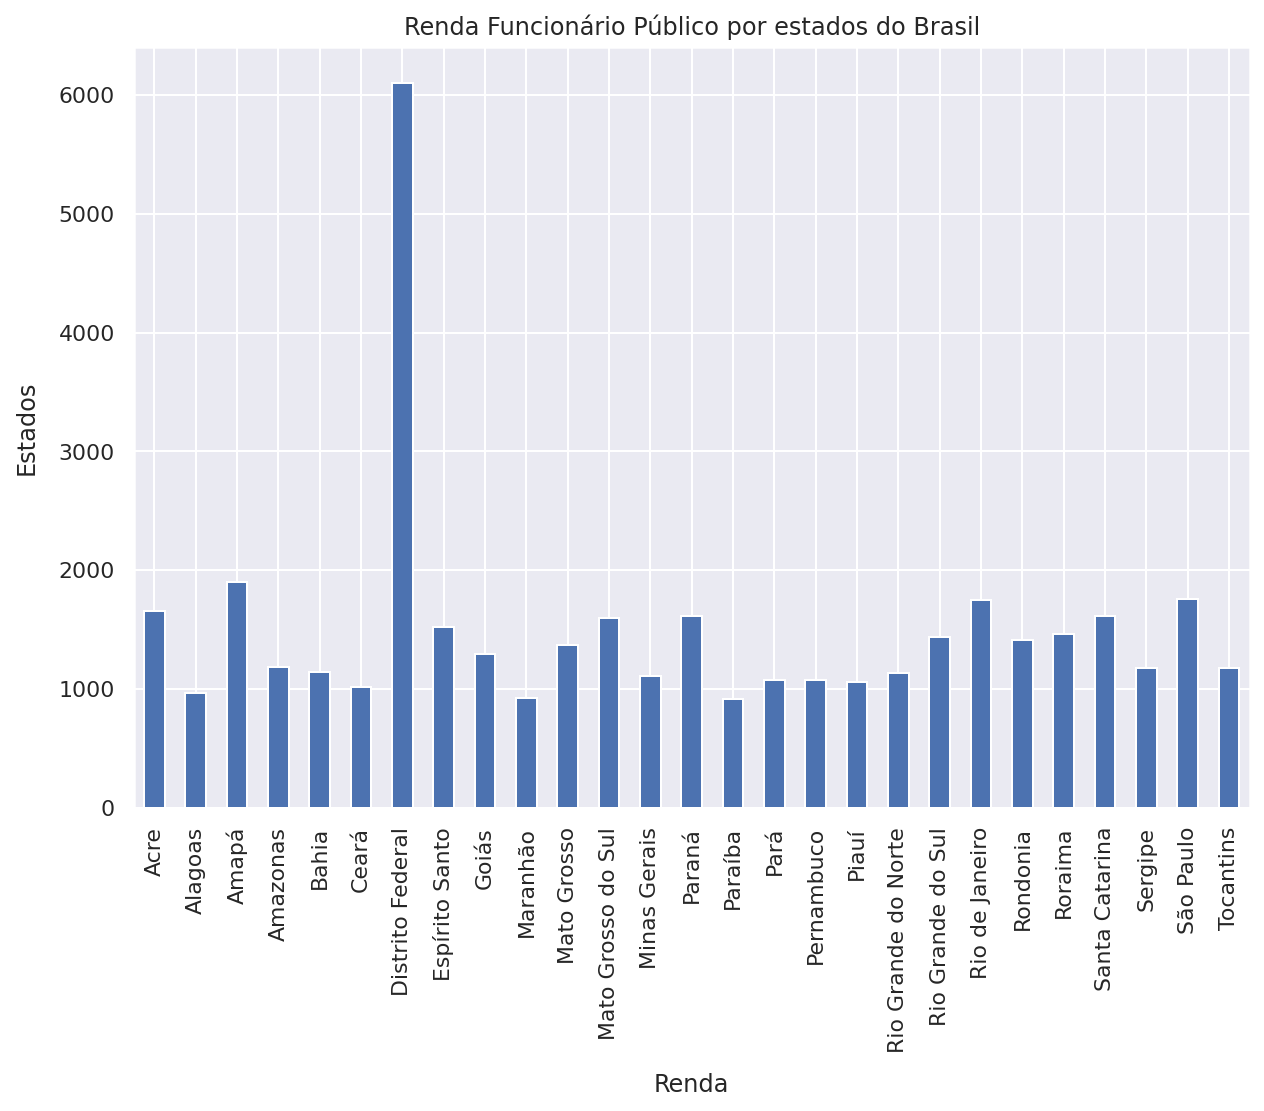

In [ ]:
ax = rend_funcpubl.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda Funcionário Público por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [ ]:
rend_empreg_nclt = df.groupby(
        by='Estado'
    )['rend_empreg_nclt'].mean()

rend_empreg_nclt

Estado
Acre                    583.454545
Alagoas                 397.598039
Amapá                   641.812500
Amazonas                612.274194
Bahia                   398.417266
Ceará                   367.809783
Distrito Federal       1056.000000
Espírito Santo          552.935897
Goiás                   598.991870
Maranhão                442.631336
Mato Grosso             685.446809
Mato Grosso do Sul      589.025641
Minas Gerais            501.484174
Paraná                  561.338346
Paraíba                 384.219731
Pará                    518.986014
Pernambuco              409.513514
Piauí                   387.142857
Rio Grande do Norte     414.125749
Rio Grande do Sul       609.981855
Rio de Janeiro          619.760870
Rondonia                567.000000
Roraima                 655.933333
Santa Catarina          668.416382
Sergipe                 400.146667
São Paulo               632.862016
Tocantins               536.474820
Name: rend_empreg_nclt, dtype: float64

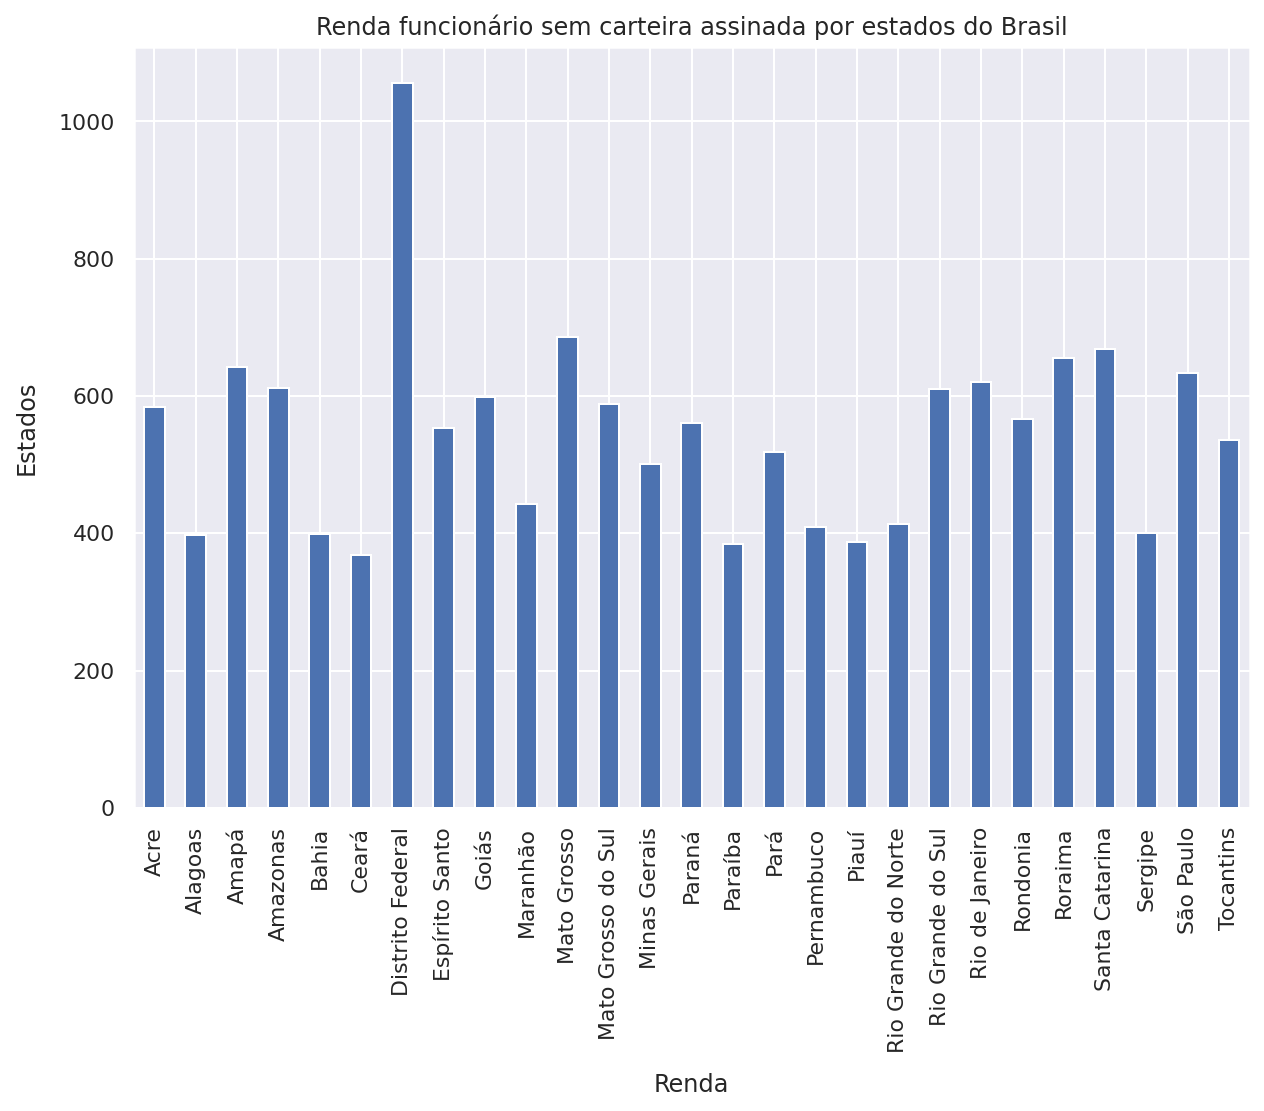

In [ ]:
ax = rend_empreg_nclt.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda funcionário sem carteira assinada por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [ ]:
rend_autonomos = df.groupby(
        by='Estado'
    )['rend_autonomos'].mean()

rend_autonomos

Estado
Acre                    742.227273
Alagoas                 522.764706
Amapá                   816.937500
Amazonas                617.854839
Bahia                   525.577938
Ceará                   469.923913
Distrito Federal       2119.000000
Espírito Santo          942.743590
Goiás                  1239.430894
Maranhão                472.718894
Mato Grosso            1359.652482
Mato Grosso do Sul     1255.089744
Minas Gerais            957.066823
Paraná                 1130.258145
Paraíba                 457.618834
Pará                    679.426573
Pernambuco              531.416216
Piauí                   415.116071
Rio Grande do Norte     528.029940
Rio Grande do Sul      1123.241935
Rio de Janeiro         1064.141304
Rondonia               1014.403846
Roraima                 853.733333
Santa Catarina         1202.890785
Sergipe                 473.946667
São Paulo              1355.815504
Tocantins               883.884892
Name: rend_autonomos, dtype: float64

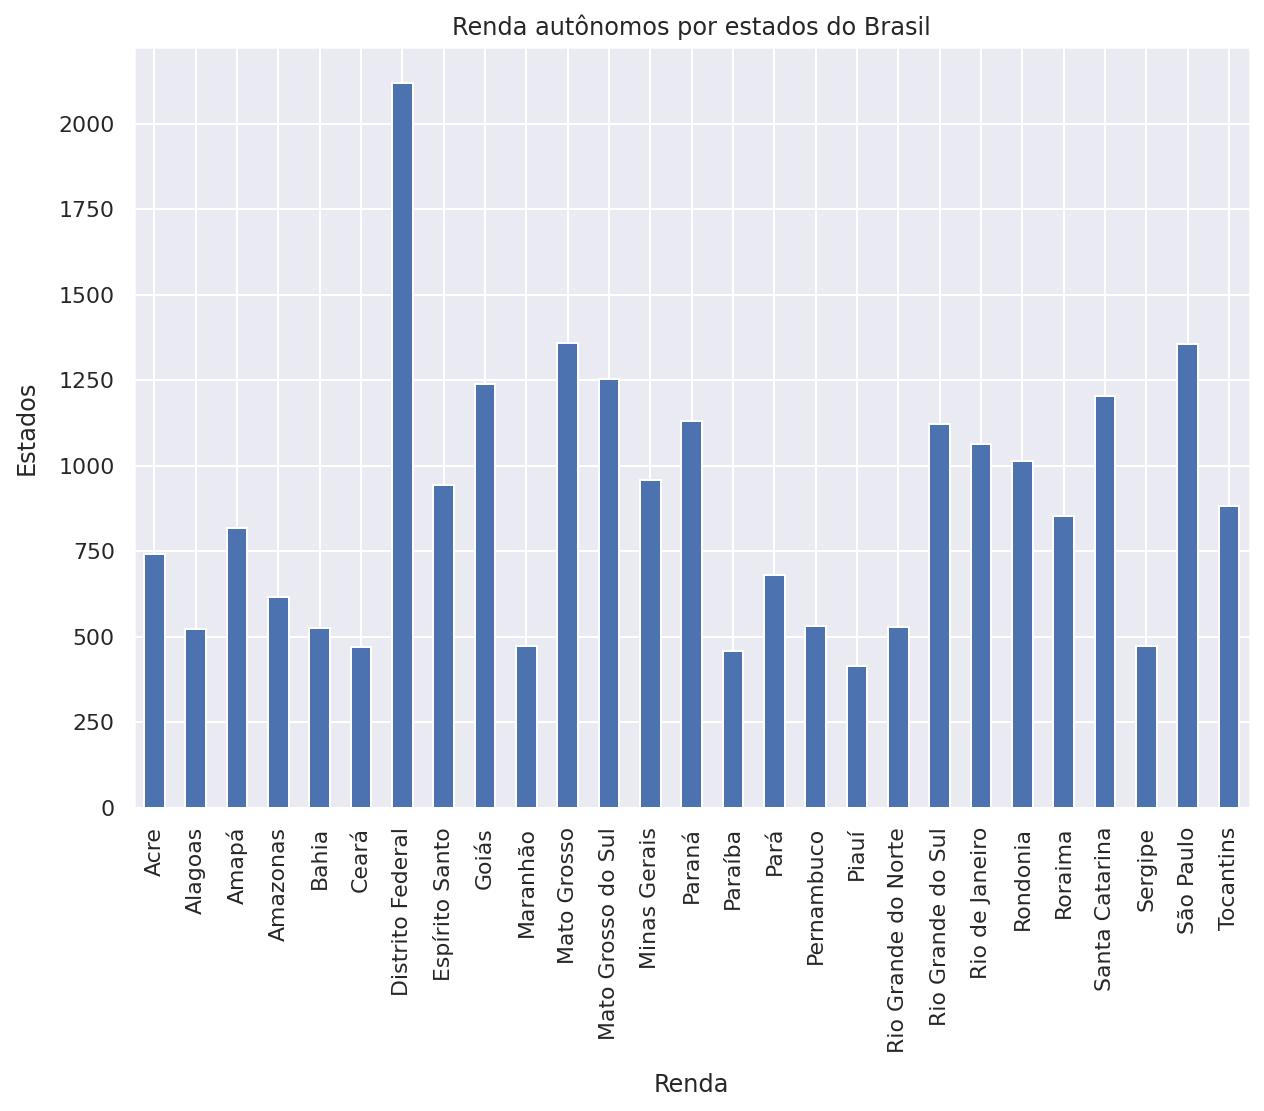

In [ ]:
ax = rend_autonomos.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda autônomos por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [ ]:
rend_empregador = df.groupby(
        by='Estado'
    )['rend_empregador'].mean()

rend_empregador

Estado
Acre                   4568.090909
Alagoas                2317.607843
Amapá                  4914.812500
Amazonas               5110.629032
Bahia                  2508.472422
Ceará                  2088.038043
Distrito Federal       7475.000000
Espírito Santo         3521.166667
Goiás                  4599.471545
Maranhão               2652.156682
Mato Grosso            4310.070922
Mato Grosso do Sul     5108.628205
Minas Gerais           3184.187573
Paraná                 3718.478697
Paraíba                1744.121076
Pará                   4360.902098
Pernambuco             2715.156757
Piauí                  1938.084821
Rio Grande do Norte    2092.892216
Rio Grande do Sul      3775.566532
Rio de Janeiro         3605.565217
Rondonia               4052.192308
Roraima                3020.400000
Santa Catarina         3476.542662
Sergipe                2211.586667
São Paulo              4132.153488
Tocantins              3363.151079
Name: rend_empregador, dtype: float64

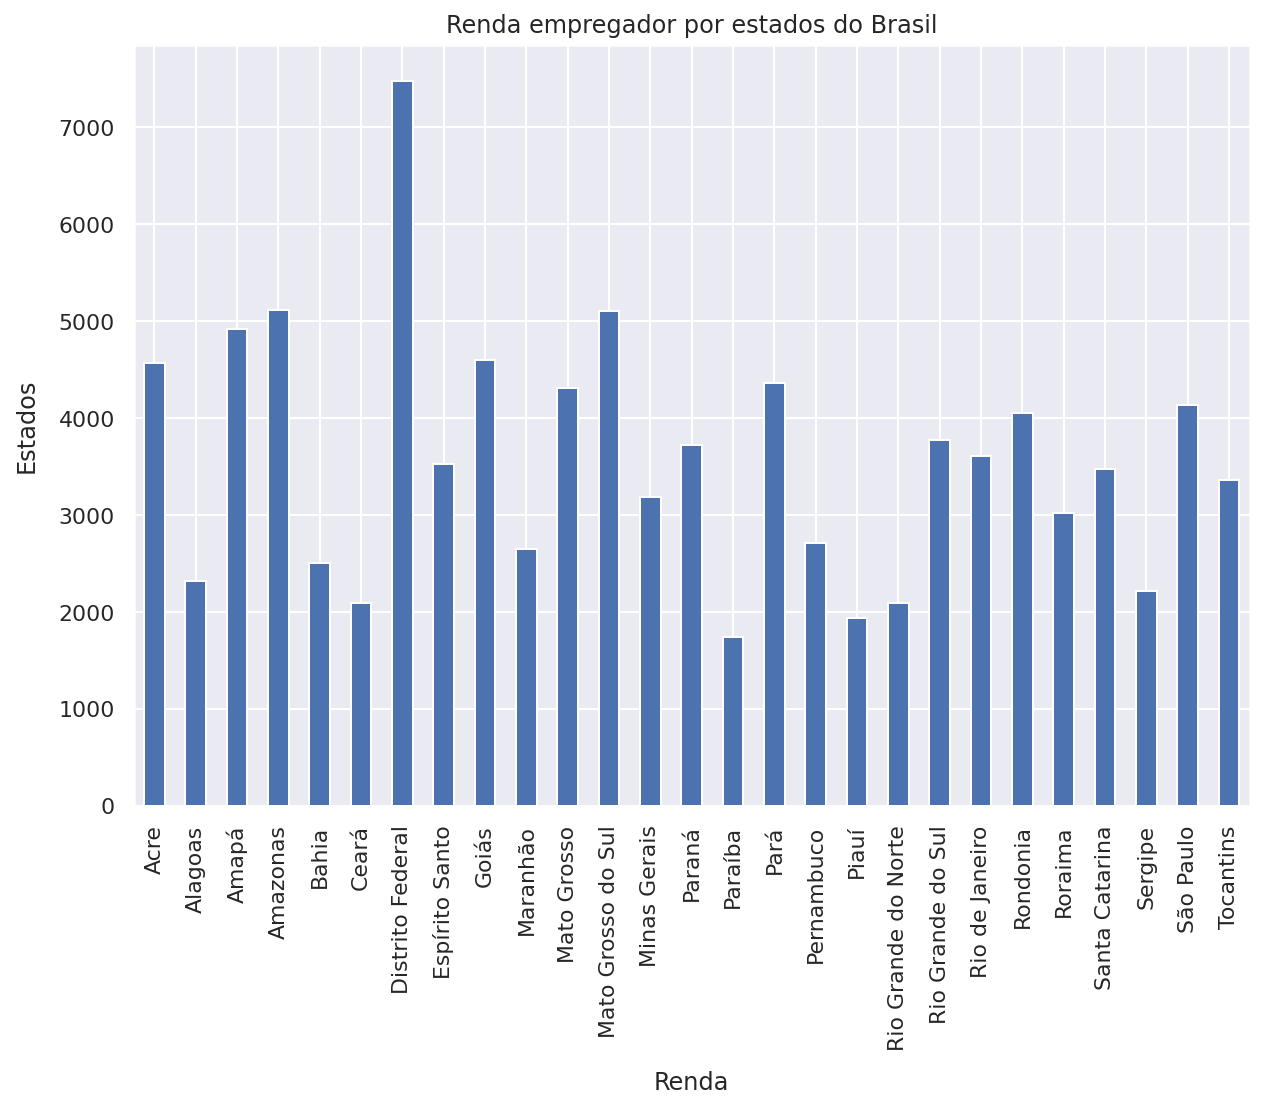

In [ ]:
ax = rend_empregador.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda empregador por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

## Região norte - renda

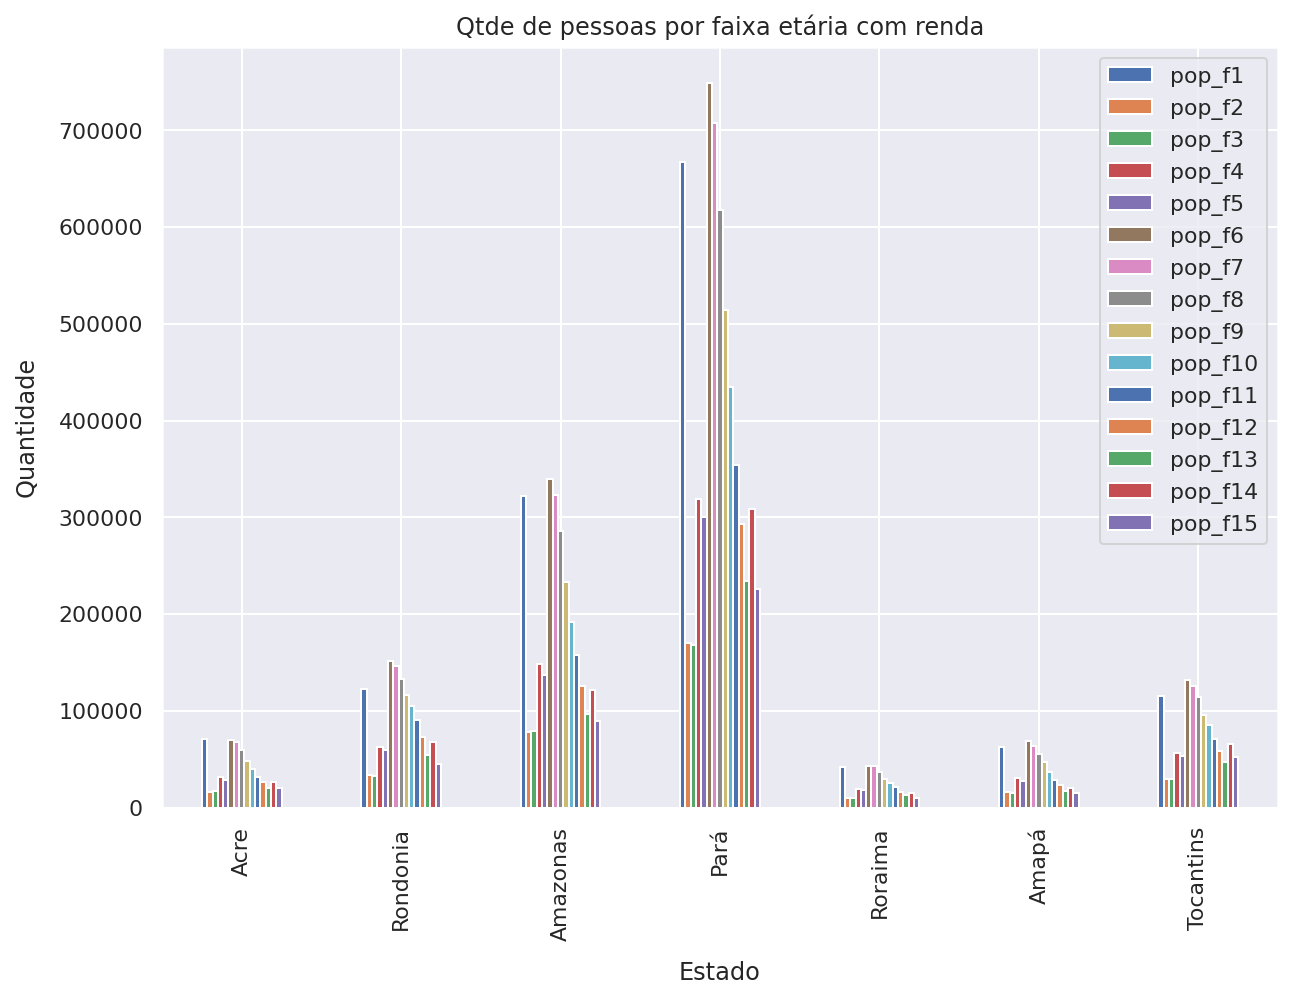

In [ ]:
## Renda por faixa etária

ax = pop_renda_faixa_idade.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='bar',
    grid=True,
    figsize=(10, 7),
    title='Qtde de pessoas por faixa etária com renda'
)

ax.set_xlabel('Estado')
ax.set_ylabel('Quantidade')

plt.show()

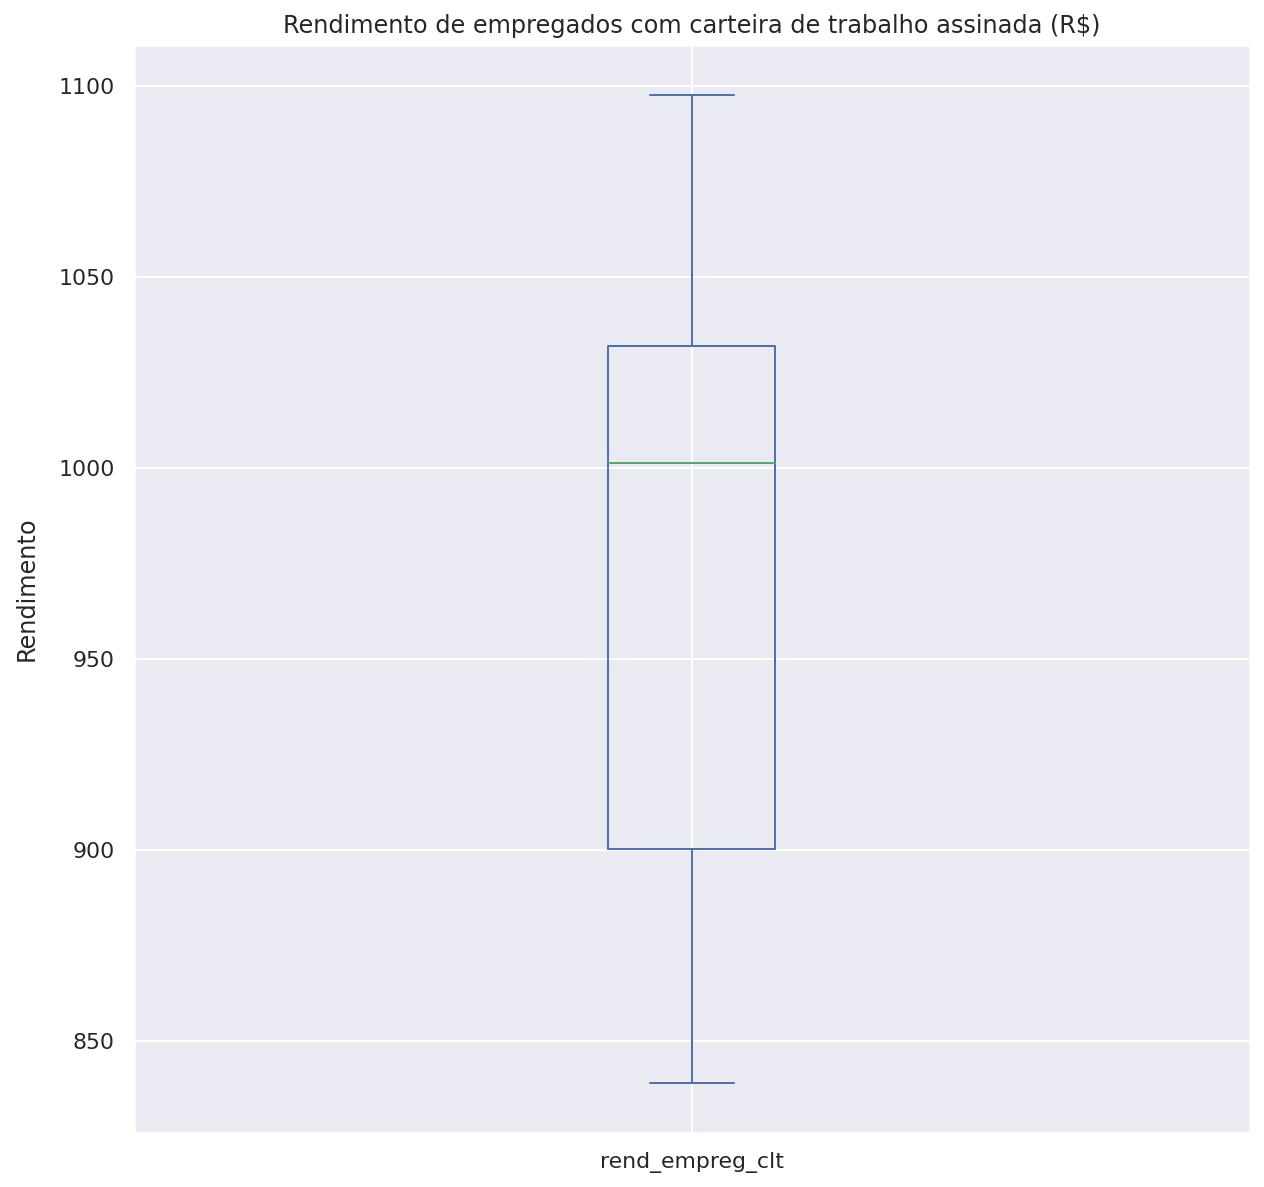

In [ ]:
## Renda por empregados CLT

ax = rend_empreg_clt.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de empregados com carteira de trabalho assinada (R$)')

plt.show()

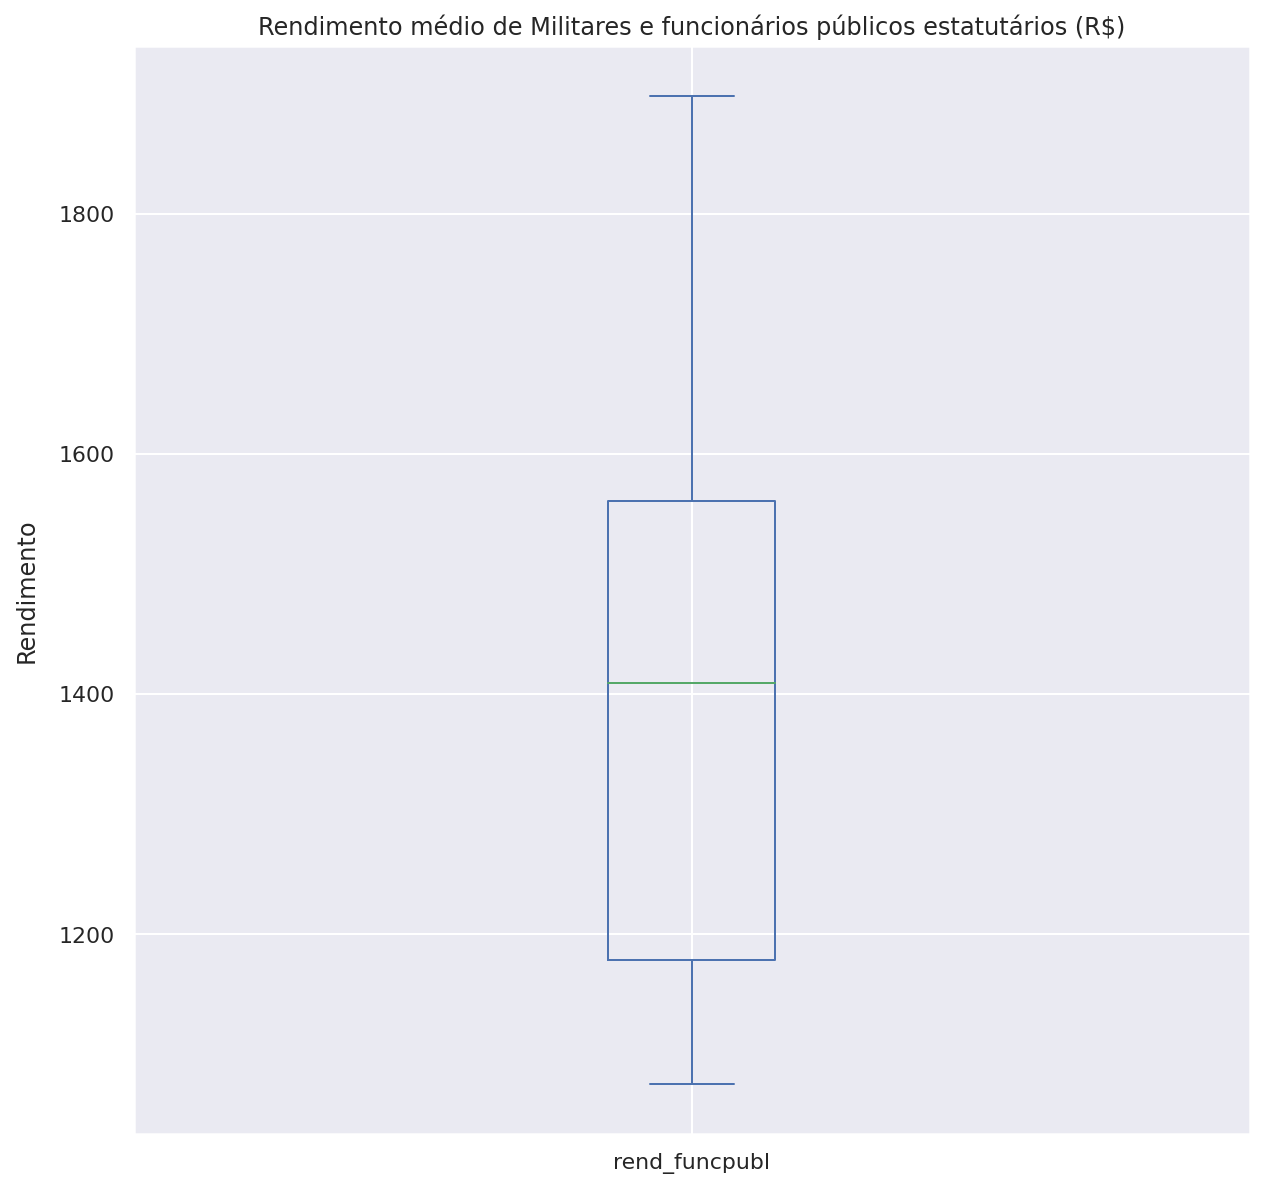

In [ ]:
# Renda por funcionário publico
ax = rend_funcpubl.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento médio de Militares e funcionários públicos estatutários (R$)')

plt.show()

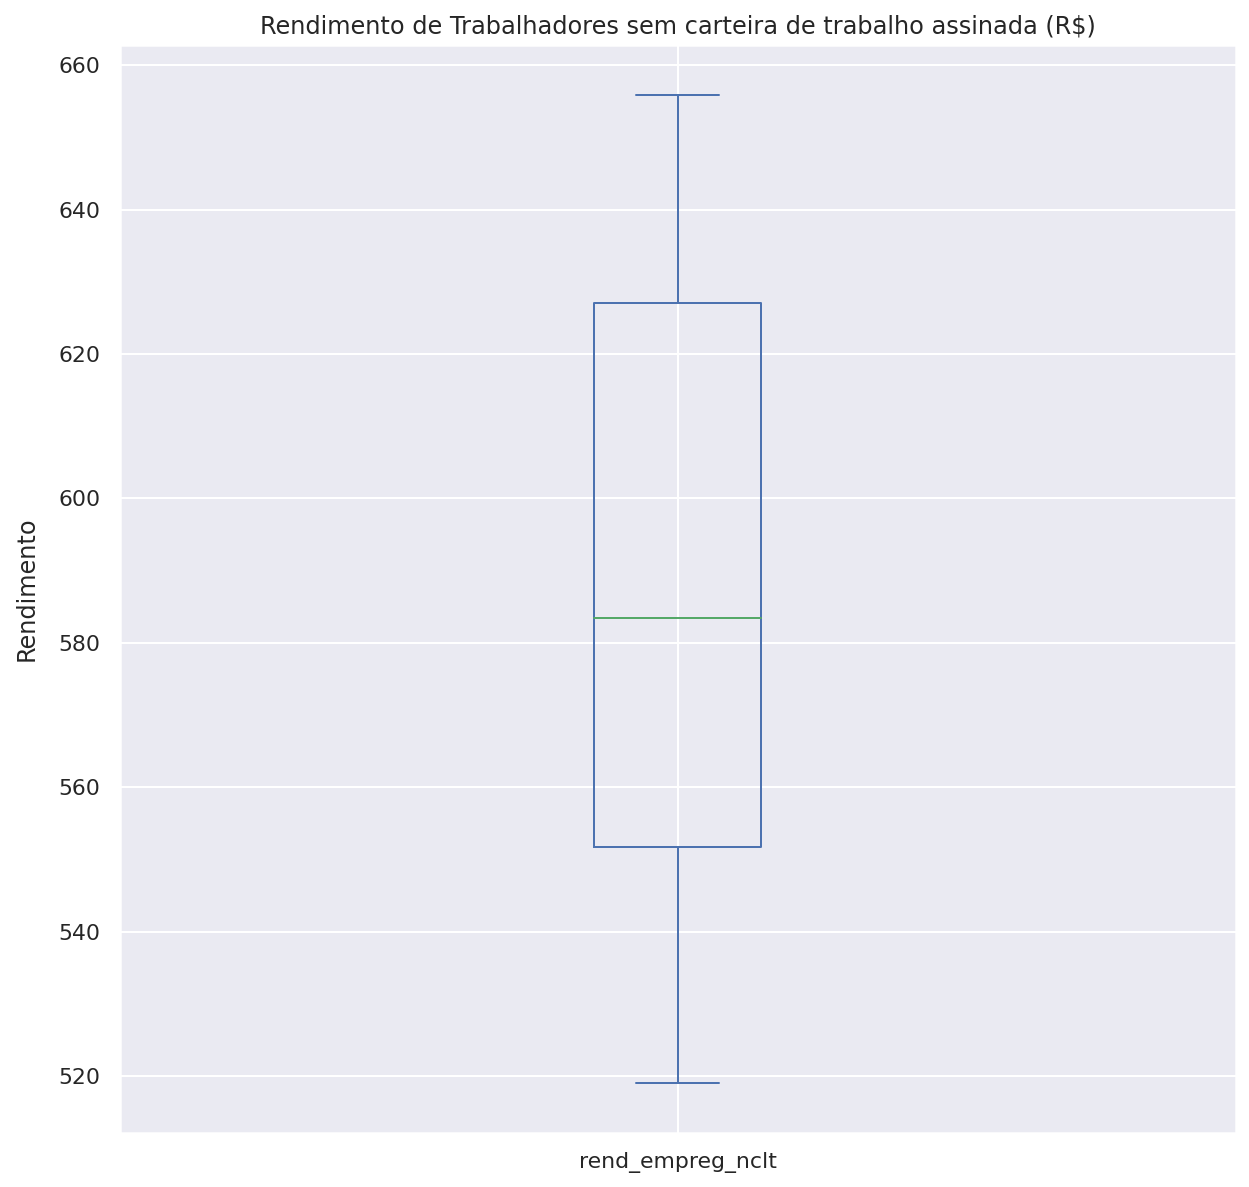

In [ ]:
# Renda por funcionário sem carteira assinada 
ax = rend_empreg_nclt.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Trabalhadores sem carteira de trabalho assinada (R$)')

plt.show()

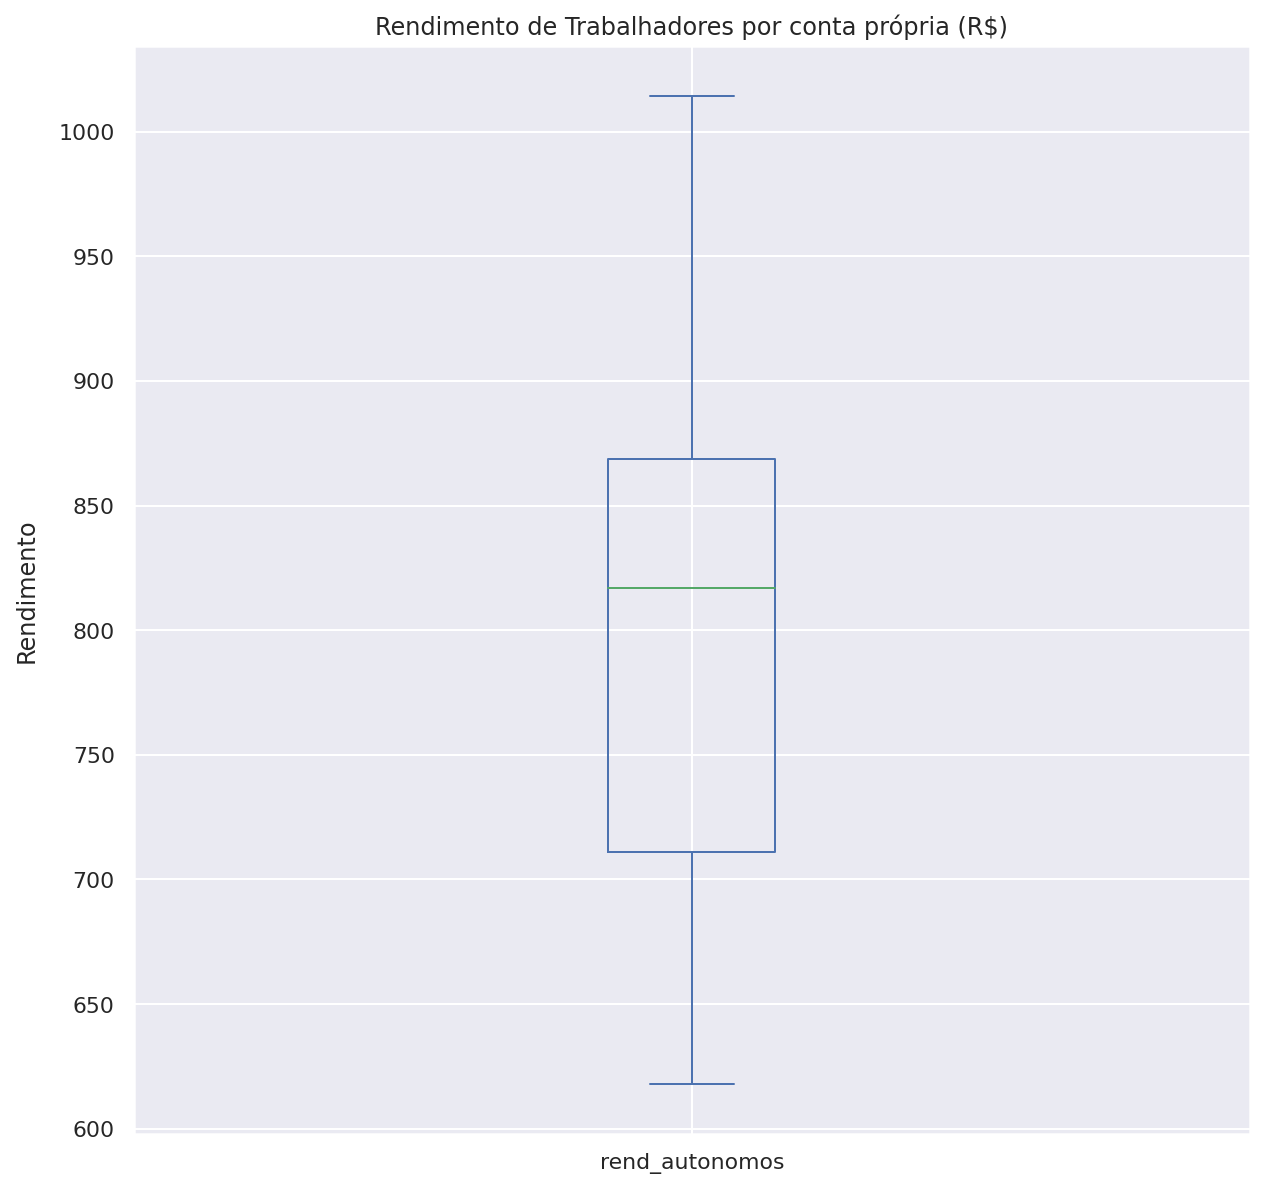

In [ ]:
# Renda por autonomos 
ax = rend_autonomos.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Trabalhadores por conta própria (R$)')

plt.show()

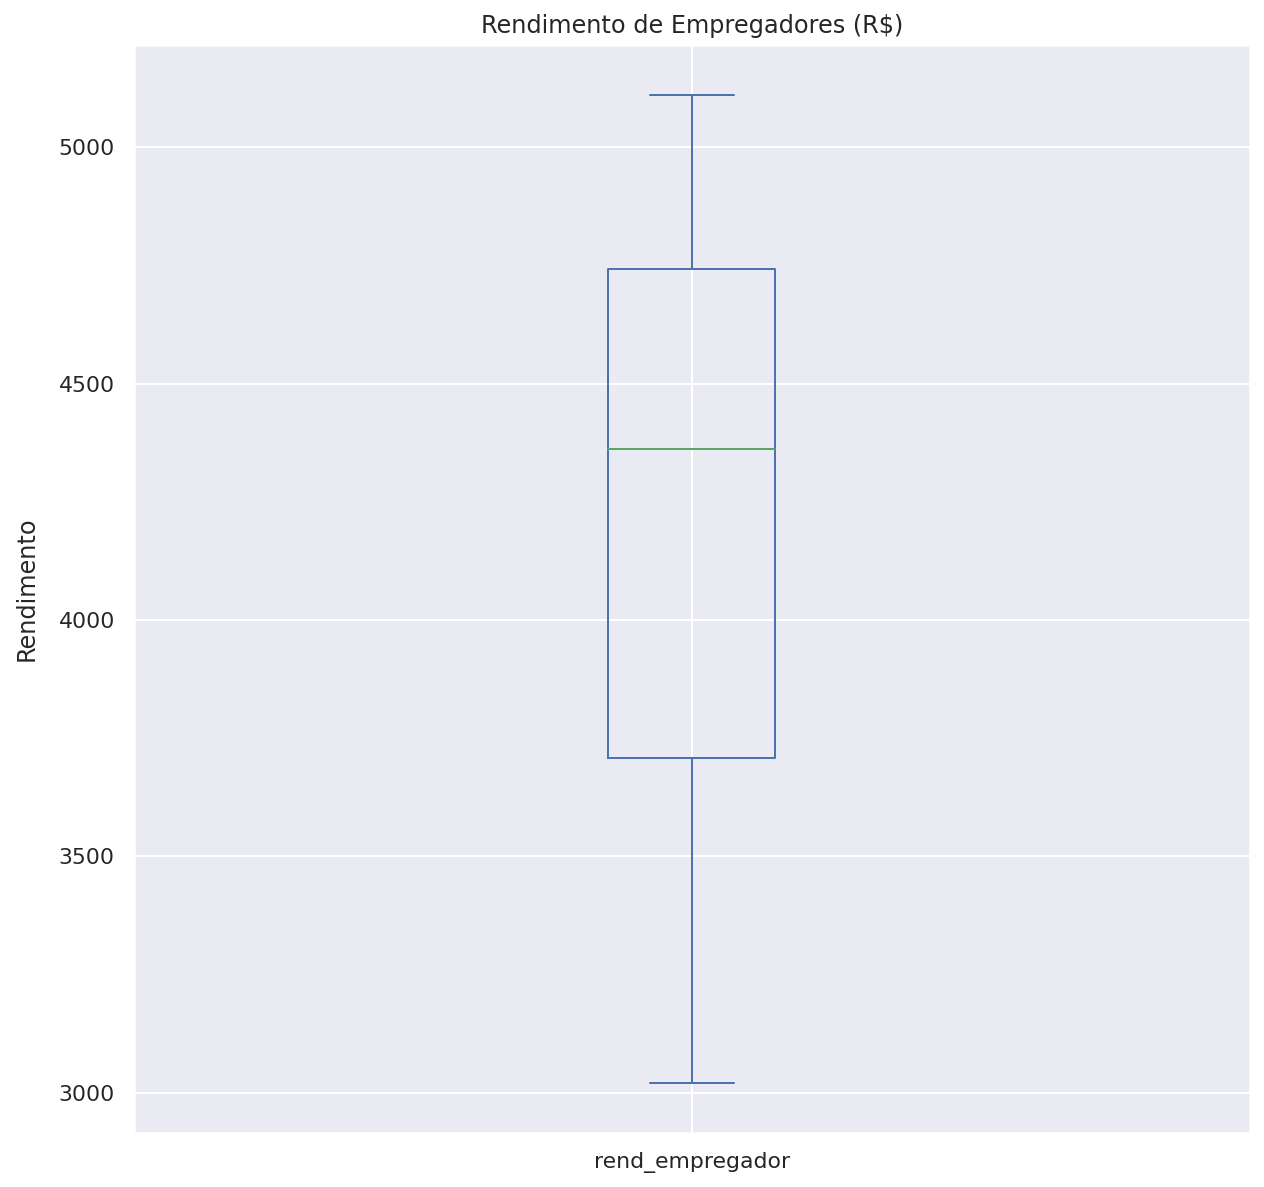

In [ ]:
# Renda por empregador 
ax = rend_empregador.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Empregadores (R$)')

plt.show()

## Escolaridade

In [ ]:
escolaridade_por_estado = df.groupby(
        by='Estado'
    )['adult_fundament_incomp', 'adult_medio_incomp', 'adult_sup_incomp', 'adult_sup_completo'].mean()

escolaridade_por_estado

<ipython-input-143-744edb2f747a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  escolaridade_por_estado = df.groupby(


,adult_fundament_incomp,adult_medio_incomp,adult_sup_incomp,adult_sup_completo
Estado,,,,
Acre,8629.000000,1876.727273,3477.727273,1383.363636
Alagoas,10027.117647,1765.843137,2848.637255,1087.990196
Amapá,8056.187500,2617.500000,6321.375000,2074.937500
Amazonas,12549.467742,3604.290323,7736.370968,2153.822581
Bahia,10888.035971,2186.366906,4376.489209,1197.112710
Ceará,14261.483696,3362.293478,5509.902174,1788.532609
Distrito Federal,451003.000000,210195.000000,470597.000000,358275.000000
Espírito Santo,13154.128205,3828.679487,6667.641026,2948.576923
Goiás,7052.768293,2136.256098,3449.617886,1449.621951


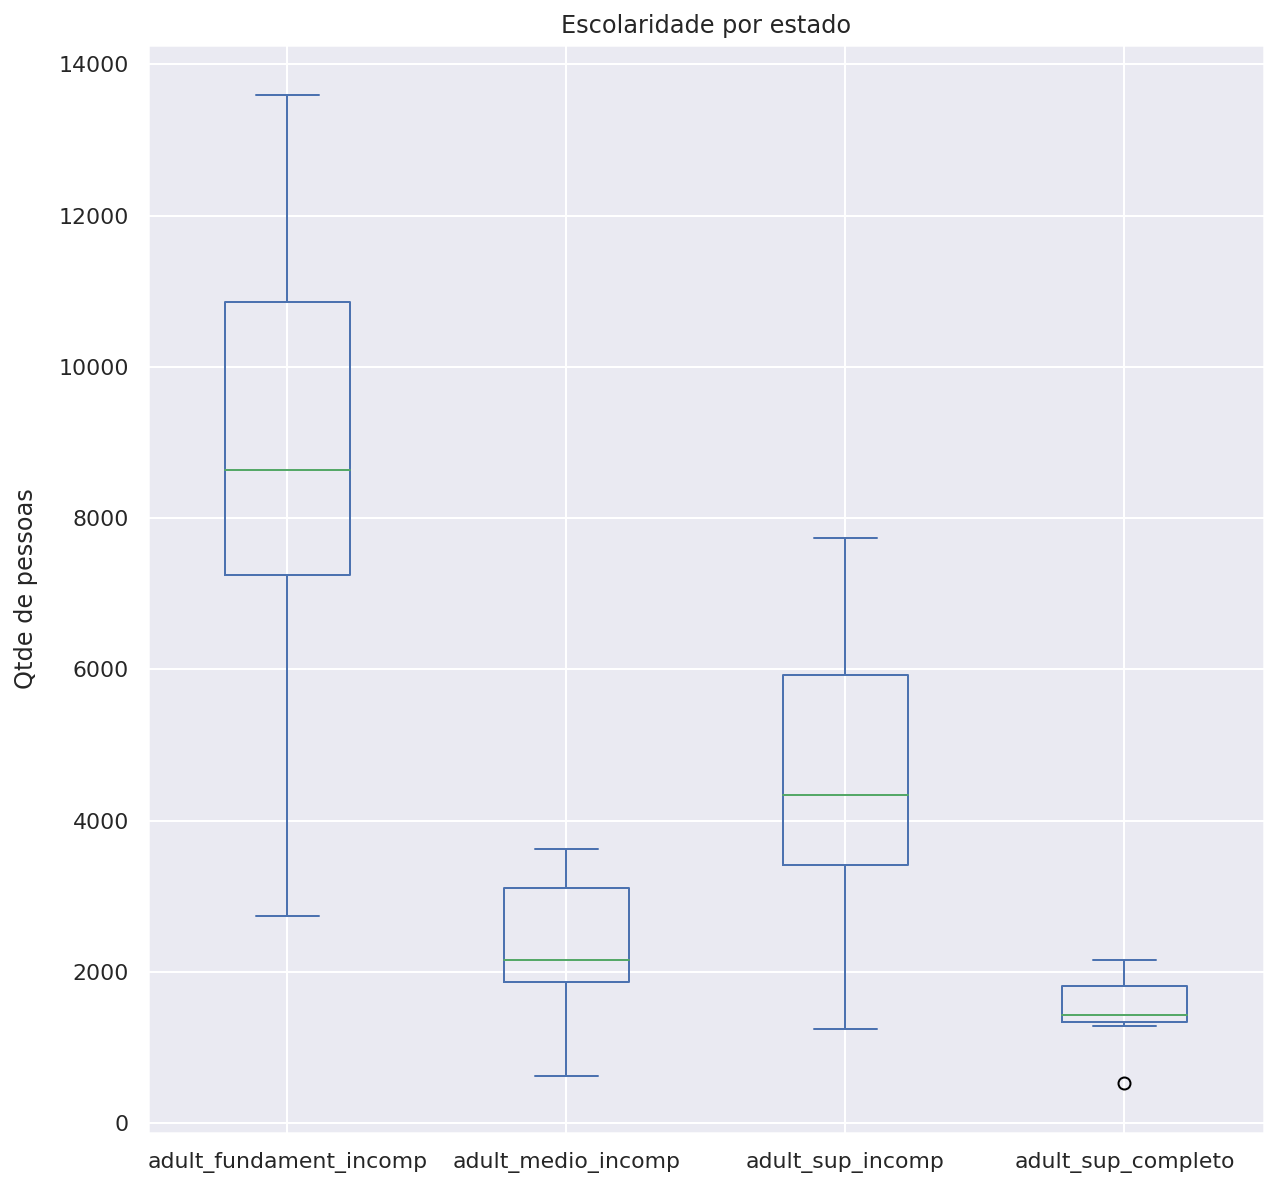

In [ ]:
ax = escolaridade_por_estado.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Qtde de pessoas')
ax.set_title('Escolaridade por estado')

plt.show()

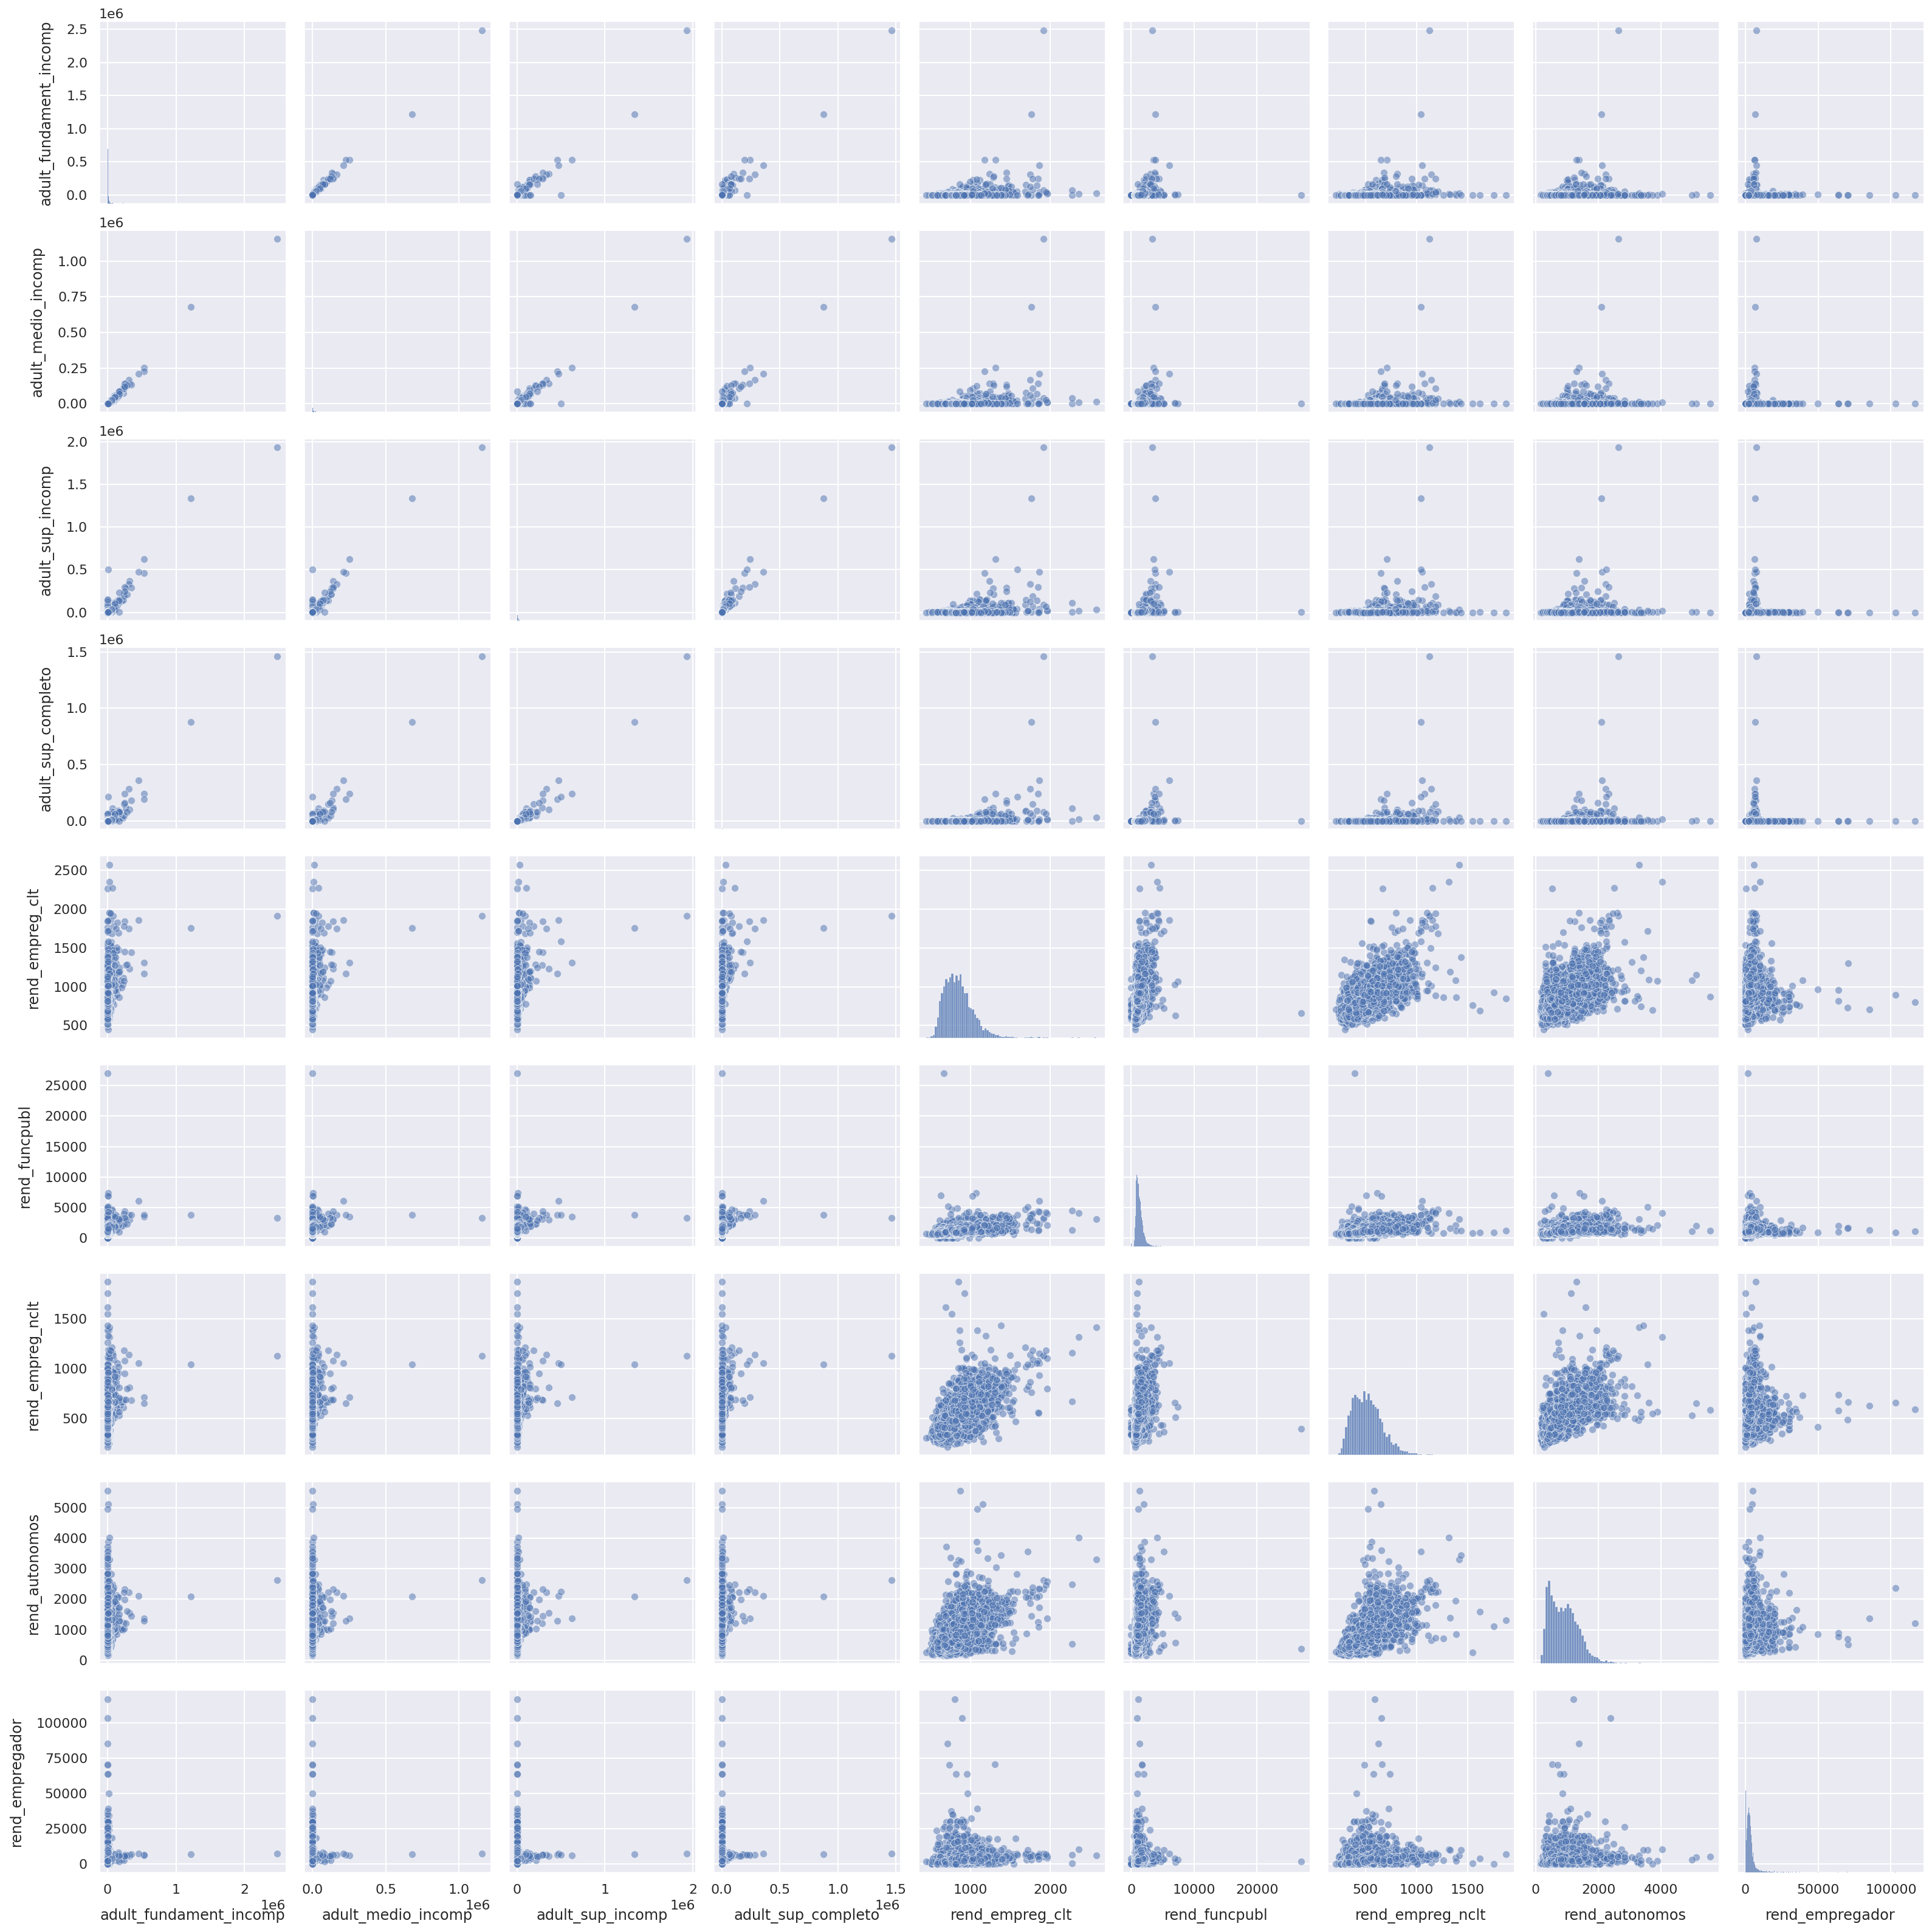

In [ ]:
# pair plot renda vs escolaridade

cols = ['adult_fundament_incomp', 'adult_medio_incomp', 'adult_sup_incomp', 'adult_sup_completo', 'rend_empreg_clt', 'rend_funcpubl', 'rend_empreg_nclt', 'rend_autonomos', 'rend_empregador']

sns.pairplot(df[cols],
             plot_kws={'alpha': 0.5})